In [1]:
# Import
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, colors as mcolors
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from evclust.datasets import load_forest, load_thyroid, load_libras

In [5]:
def plotting(X, y, ds_name, matrix_plot=False, label_column_nm='class'):
    labels_encoder = LabelEncoder()
    numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
    df = pd.concat([X, y], axis=1)

    # Scatter matrix plot
    if matrix_plot:
        sns.pairplot(df, corner=True, hue="class")

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)  # Reduce to 2 dimensions
    data_reduced = pca.fit_transform(X)
    variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

    # Plot the reduced dataset with different colors for each cluster
    print(X[:5])
    colors = [mcolors.to_rgba('C{}'.format(i)) for i in numeric_labels]

    plt.figure(figsize=(8, 6))
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=colors)
    plt.title(f"{ds_name} - 2D Plot of the Dataset after PCA")
    plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
    plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
    plt.legend()
    plt.grid(True)
    # plt.axis('equal')
    # plt.ylim(-5, 5)
    # plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

Instances: 625; Features: 4; Clusters: class    3
dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   right-distance  right-weight  left-distance  left-weight
0               1             1              1            1
1               2             1              1            1
2               3             1              1            1
3               4             1              1            1
4               5             1              1            1
5               1             2              1            1
6               2             2              1            1
7               3             2              1            1
8               4             2              1            1
9               5             2              1            1


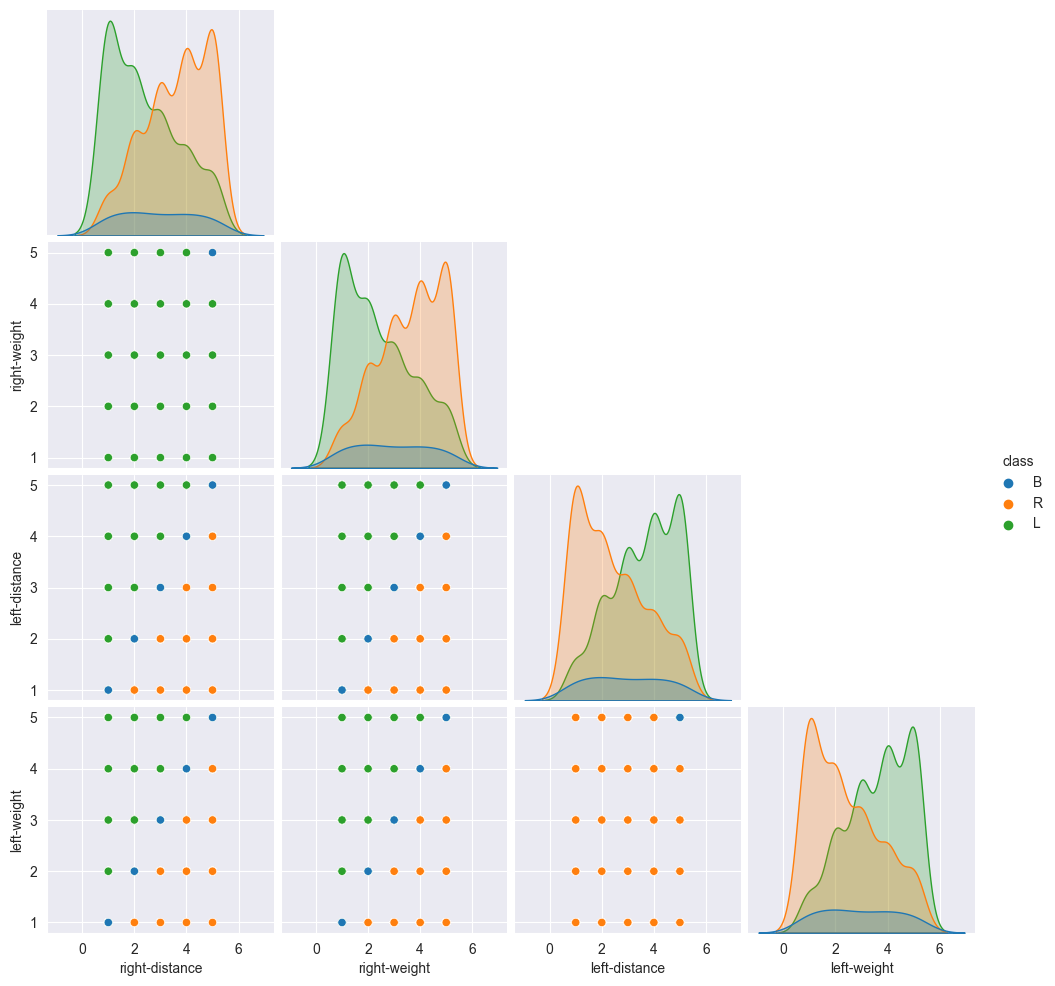

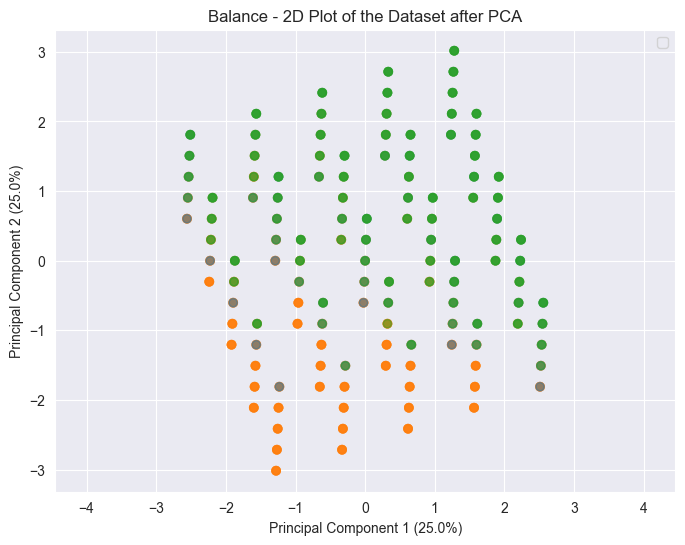

In [13]:
### BALANCE dataset
# fetch dataset 
balance_scale = fetch_ucirepo(id=12)

# data (as pandas dataframes) 
X = balance_scale.data.features
y = balance_scale.data.targets

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")
plotting(X, y, "Balance", True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Instances: 325; Features: 27; Clusters: class    4
dtype: int64
   b1  b2  b3   b4  b5   b6   b7  b8  b9  pred_minus_obs_H_b1  ...  \
0  67  51  68  115  69  111  136  31  67                47.70  ...   
1  67  28  51   99  50   97   82  26  59                47.93  ...   
2  63  26  50   95  49   91   81  26  57                53.09  ...   
3  63  42  63   97  66  108  111  28  59                52.41  ...   
4  46  27  50   83  51   90   76  26  56                68.54  ...   

   pred_minus_obs_H_b9  pred_minus_obs_S_b1  pred_minus_obs_S_b2  \
0                -9.17               -18.27                -1.80   
1                -2.25               -20.13                -2.11   
2                -0.44               -17.64                -1.81   
3                -2.34               -20.20                -1.89   
4                 1.25               -18.62                -2.17   

   pred_minus_obs_S_b3  pred_minus_obs_S_b4  pred_minus_obs_S_b5  \
0                -6.32               -

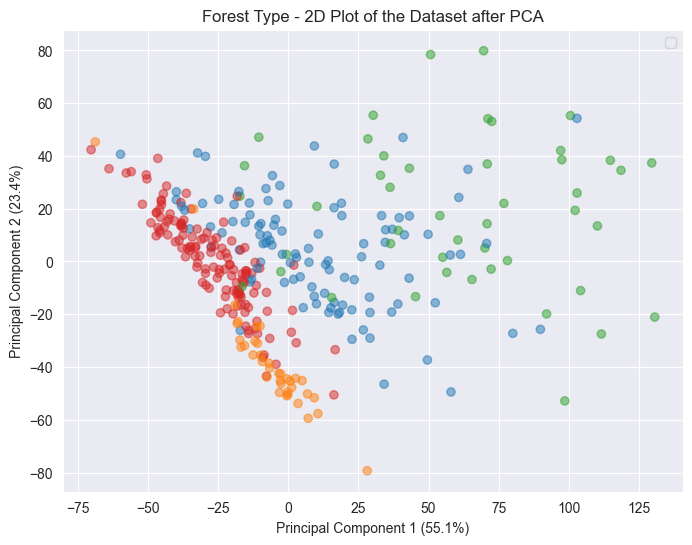

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         0         1         2         3         4         5         6   \
0  2.368421  2.058824  1.363636  3.194444  2.280702  2.545455  5.000000   
1  2.368421  0.367647  0.259740  2.083333  0.614035  1.272727  2.127660   
2  2.105263  0.220588  0.194805  1.805556  0.526316  0.727273  2.074468   
3  2.105263  1.397059  1.038961  1.944444  2.017544  2.272727  3.670213   
4  0.986842  0.294118  0.194805  0.972222  0.701754  0.636364  1.808511   

         7         8         9   ...        17        18        19        20  \
0  0.923077  1.594203  2.634660  ...  3.618479  2.238571  2.544582  1.702509   
1  0.538462  1.014493  2.648835  ...  4.128352  1.749869  2.331962  1.689068   
2  0.538462  0.869565  2.966843  ...  4.261715  2.404099  2.537723  2.428315   
3  0.692308  1.014493  2.924935  ...  4.121721  1.731477  2.482853  2.083333   
4  0.538462  0.797101  3.919019  ...  4.386236  2.146611  2.290809  1.348566   

         21        22        23        24        25        26  
0  3

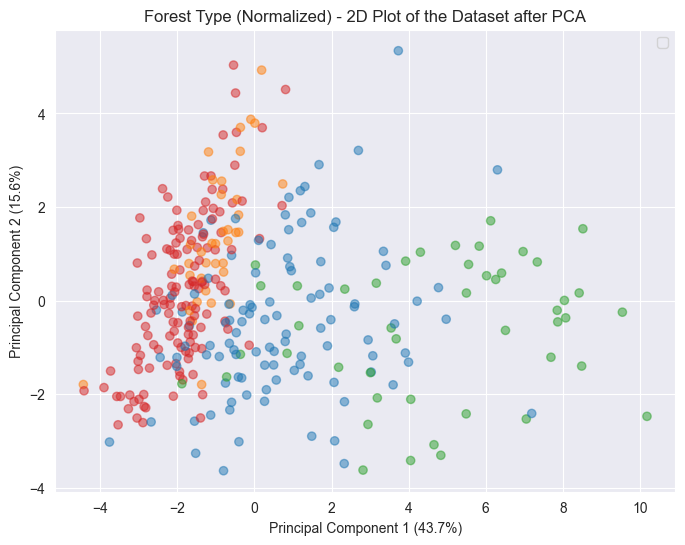

In [43]:
### Forest Type dataset
# fetch dataset 
forest_type = load_forest()

# data (as pandas dataframes) 
scaler = MinMaxScaler((0,5))
# scaler = StandardScaler()
# scaler = RobustScaler()
X = forest_type.iloc[:, 1:]
X_normalized = pd.DataFrame(scaler.fit_transform(X))

y = pd.DataFrame(forest_type.iloc[:, 0])
print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

plotting(X, y, "Forest Type")
plotting(X_normalized, y, "Forest Type (Normalized)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Instances: 215; Features: 5; Clusters: class    3
dtype: int64
    f1    f2   f3   f4   f5
0  107  10.1  2.2  0.9  2.7
1  113   9.9  3.1  2.0  5.9
2  127  12.9  2.4  1.4  0.6
3  109   5.3  1.6  1.4  1.5
4  105   7.3  1.5  1.5 -0.1


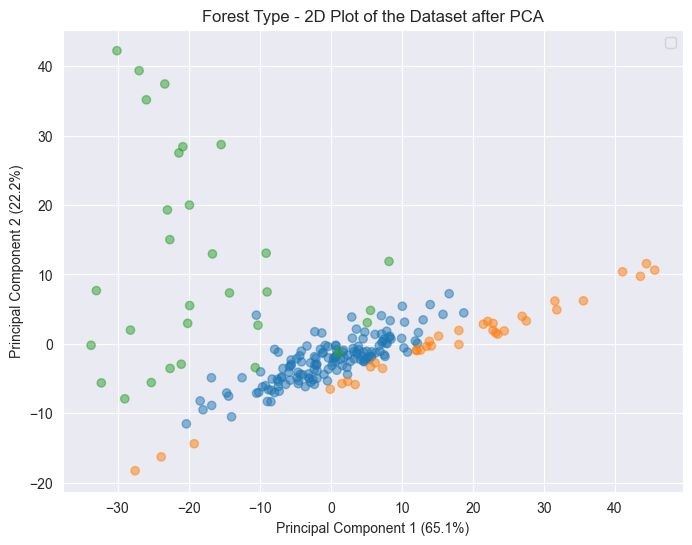

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          0         1         2         3         4
0  2.658228  1.935484  1.020408  0.071048  0.298246
1  3.037975  1.895161  1.479592  0.168739  0.578947
2  3.924051  2.500000  1.122449  0.115453  0.114035
3  2.784810  0.967742  0.714286  0.115453  0.192982
4  2.531646  1.370968  0.663265  0.124334  0.052632


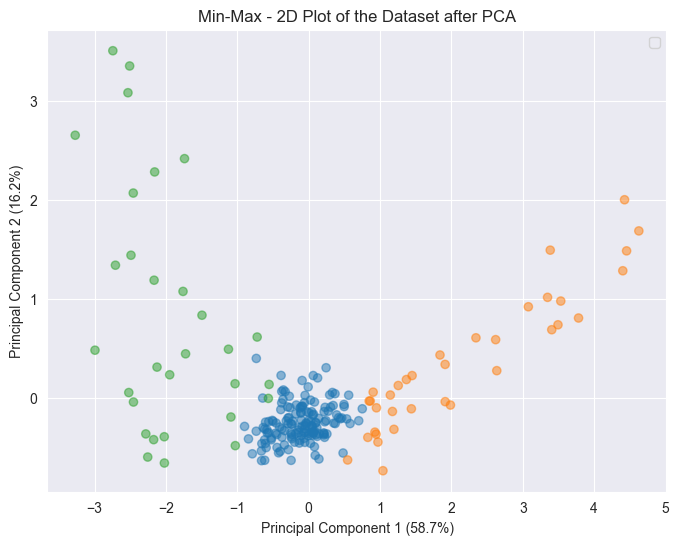

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          0         1         2         3         4
0 -0.197894  0.063022  0.105754 -0.324389 -0.186180
1  0.259603  0.020346  0.741266 -0.144173  0.211250
2  1.327096  0.660493  0.246979 -0.242472 -0.446993
3 -0.045395 -0.961213 -0.317920 -0.242472 -0.335216
4 -0.350393 -0.534448 -0.388533 -0.226089 -0.533931


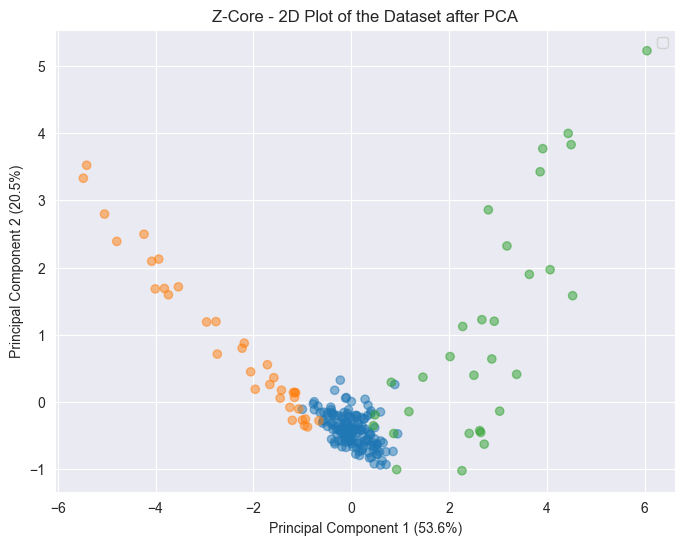

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          0         1         2         3         4
0 -0.206897  0.214286  0.588235 -0.571429  0.197183
1  0.206897  0.166667  1.647059  1.000000  1.098592
2  1.172414  0.880952  0.823529  0.142857 -0.394366
3 -0.068966 -0.928571 -0.117647  0.142857 -0.140845
4 -0.344828 -0.452381 -0.235294  0.285714 -0.591549


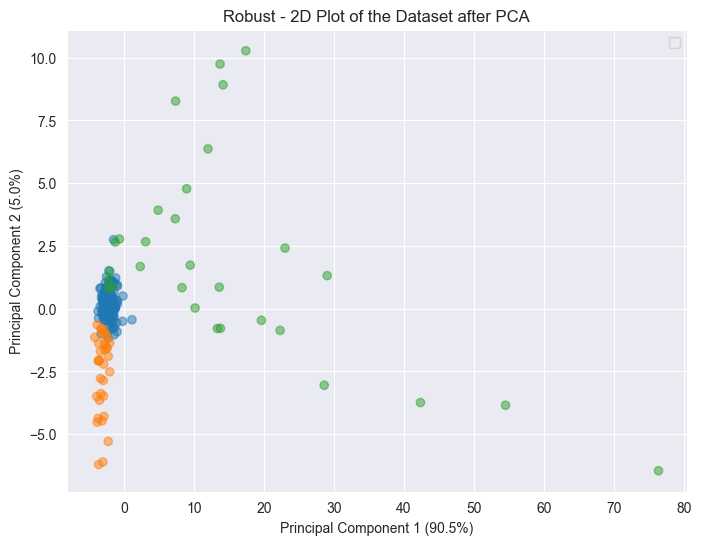

In [45]:
### Thyroid dataset
# fetch dataset 
thyroid = load_thyroid()

# data (as pandas dataframes) 
X = thyroid.iloc[:, 1:]
y = pd.DataFrame(thyroid.iloc[:, 0])

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

scaler = MinMaxScaler((0,5))
scaler2 = StandardScaler()
scaler3 = RobustScaler()
X_minmax = pd.DataFrame(scaler.fit_transform(X))
X_zcore = pd.DataFrame(scaler2.fit_transform(X))
X_robust = pd.DataFrame(scaler3.fit_transform(X))

plotting(X, y, "Forest Type")
plotting(X_minmax, y, "Min-Max")
plotting(X_zcore, y, "Z-Core")
plotting(X_robust, y, "Robust")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Instances: 101; Features: 16; Clusters: type    7
dtype: int64
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   
5     1         0     0     1         0        0         0        1         1   
6     1         0     0     1         0        0         0        1         1   
7     0         0     1     0         0        1         0        1         1   
8     0         0     1     0         0        1         1        1         1   
9     1         0     0     1         0        0         0        1         1   

   breathes  venomous  fins  legs  tail  dome

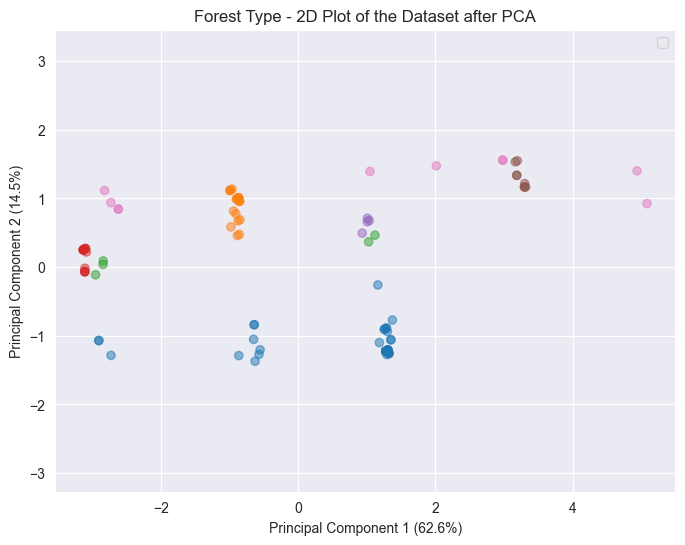

In [8]:
### ZOO dataset
# fetch dataset 
zoo = fetch_ucirepo(id=111) 
  
# data (as pandas dataframes) 
X = zoo.data.features 
y = zoo.data.targets

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")
plotting(X, y, "Forest Type", label_column_nm='type')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Instances: 360; Features: 90; Clusters: class    15
dtype: int64
        0        1        2        3        4        5        6        7   \
0  0.79691  0.38194  0.79691  0.37731  0.79884  0.37731  0.79497  0.37731   
1  0.67892  0.27315  0.68085  0.27315  0.68085  0.27315  0.68085  0.27315   
2  0.72147  0.23611  0.72340  0.23611  0.72340  0.23611  0.72340  0.23611   
3  0.56480  0.32407  0.56286  0.32407  0.56093  0.32407  0.55899  0.32407   
4  0.67118  0.38426  0.67118  0.38657  0.67311  0.38657  0.67311  0.38426   

        8        9   ...       80       81       82       83       84  \
0  0.77563  0.35417  ...  0.34043  0.51389  0.39845  0.42593  0.47389   
1  0.67892  0.26852  ...  0.19536  0.57407  0.17795  0.63657  0.17215   
2  0.72340  0.23611  ...  0.52031  0.30556  0.59768  0.25926  0.67118   
3  0.55899  0.32407  ...  0.20503  0.49074  0.26306  0.42361  0.33269   
4  0.67311  0.37963  ...  0.46422  0.76389  0.44101  0.64120  0.45068   

        85       86       87     

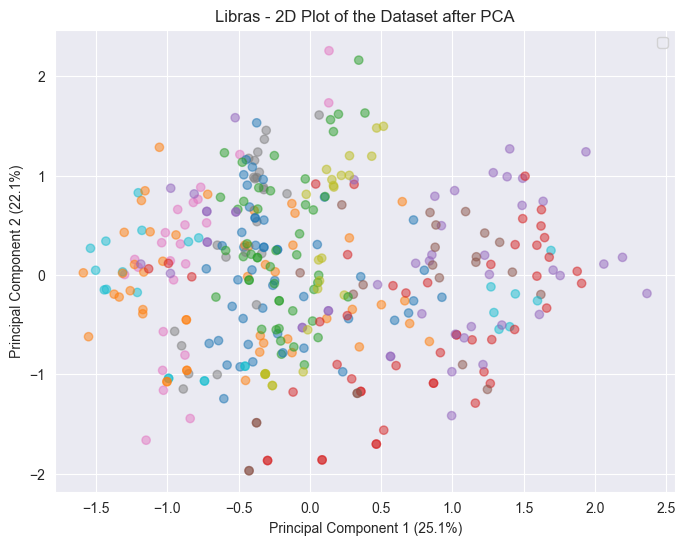

In [15]:
# fetch dataset 
libras = load_libras()

# data (as pandas dataframes) 
X = libras.iloc[:, :-1]
y = pd.DataFrame(libras.iloc[:, -1])
y = y.rename(columns={90: 'class'})

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

plotting(X, y, ds_name="Libras")